# Understanding Descriptive Statistics

Import the necessary libraries here:

In [393]:
import random
import seaborn as sns
import numpy as np
import pandas as pd
import statistics

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [320]:
def roll_dice (n):
    return random.choices(range(1,7), k=n)

dice_results = roll_dice(10)

#### 2.- Plot the results sorted by value.

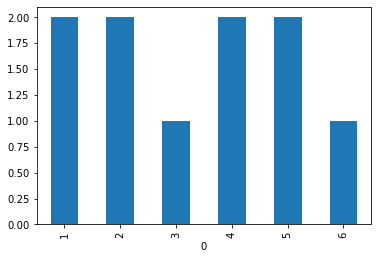

In [44]:
rolls_df = pd.DataFrame(dice_results)
rolls_df.groupby(0).size().plot(kind='bar');

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

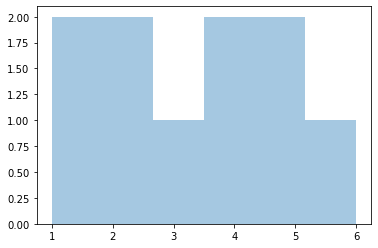

In [35]:
sns.distplot(dice_results,kde=False,bins=6)

In [ ]:
"""
In this particular case, both plots are very similar, but looks like displot are more convinient to show data wich is 
continuos or are registered between two to values, and the other one,can plot non continuos or categorical data.
"""

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [357]:
def calc_mean(results):
    return sum(results) / len(results) 
calc_mean(dice_results)

3.4

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [69]:
counts = rolls_df[0].value_counts()
percent = rolls_df[0].value_counts(normalize=True)

freq_dist = pd.DataFrame({'counts': counts, 'per': percent}).sort_index()
freq_dist

,counts,per
1,2,0.2
2,2,0.2
3,1,0.1
4,2,0.2
5,2,0.2
6,1,0.1


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [346]:
def calc_median(results):
    results.sort()
    if len(results) %2 == 0:
        position = int(len(a)/2)
        items = [a[position-1], a[position]]
        return sum(items)/len(items)
    else:
        return results[int(len(a)/2)]

calc_median(dice_results)

4.5

In [265]:
m= [0, 1, 2, 3, 4, 4, 5]

In [323]:
dice_results

[1, 2, 2, 3, 3, 3, 4, 4, 6, 6]

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [321]:
def calc_quartiles (results):
    results.sort()
    if len(results) %2 == 0:
        position = int(len(results)/2)
        sec1 = results[:position]
        sec2 = results[position:]
        q1 = sec1[int(len(sec1)/2)]
        q2 = sec2[int(len(sec2)/2)]
    
    else:
        sec1 = results[:int(len(results)/2)]
        sec2 = results[int(len(results)/2)+1:]
        q1 = sec1[int(len(sec1)/2)]
        q2 = sec2[int(len(sec2)/2)]


    return q1,q2
    

In [322]:
calc_quartiles(dice_results)

(2, 4)

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

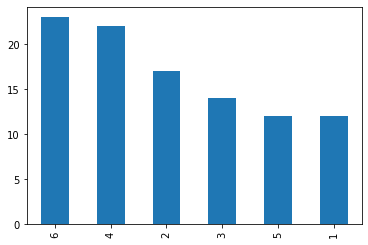

In [373]:
hundred_df = pd.read_csv('../data/roll_the_dice_hundred.csv')
hundred_df.drop('Unnamed: 0',axis=1,inplace=True)
hundred_df['value'].value_counts().plot(kind='bar');


#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [352]:
hundred_df['value'].mean()

3.74

In [358]:
result_hundred = hundred_df['value'].to_list()
calc_mean(result_hundred)

3.74

#### 3.- Now, calculate the frequency distribution.


In [360]:
counts_h = hundred_df['value'].value_counts()
percent_h = hundred_df['value'].value_counts(normalize=True)

freq_dist_h = pd.DataFrame({'counts': counts_h, 'per': percent_h}).sort_index()
freq_dist_h

,counts,per
1,12,0.12
2,17,0.17
3,14,0.14
4,22,0.22
5,12,0.12
6,23,0.23


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

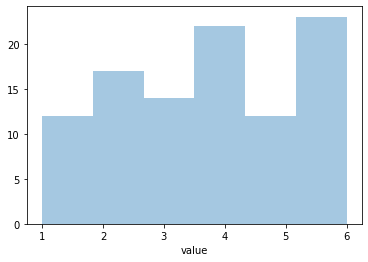

In [379]:
sns.distplot(hundred_df['value'],kde=False,bins=6);

In [ ]:
"""
mean is placed in the central point of the histogram.
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

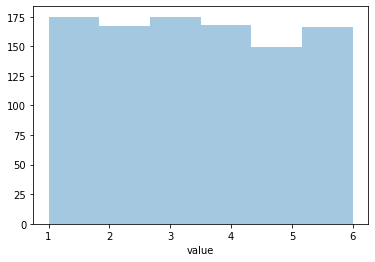

In [376]:
thousand_df = pd.read_csv('../data/roll_the_dice_thousand.csv')
thousand_df.drop('Unnamed: 0',axis=1,inplace=True)
sns.distplot(thousand_df['value'],kde=False,bins=6);

In [ ]:
"""
distribution of results are much more similar.. we have almost teh same number of results for eacch side of the dice.
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

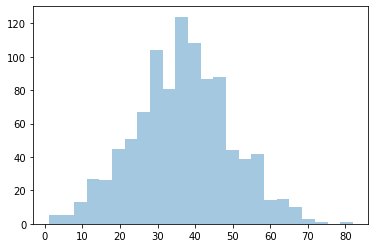

In [404]:
ages1_df = pd.read_csv('../data/ages_population.csv')
sns.distplot(ages1_df,kde=False);

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [405]:
display(ages1_df['observation'].mean())
display(ages1_df['observation'].std())


36.56

12.81649962597677

In [ ]:
"""
I made a good guess with the mean. I dont really get how to guess the std from a displot
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

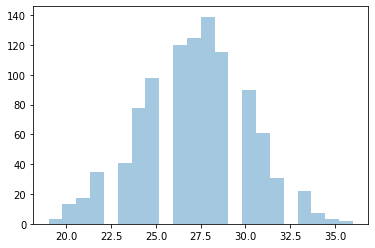

In [406]:
ages2_df = pd.read_csv('../data/ages_population2.csv')
sns.distplot(ages2_df,kde=False);


####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
looks like there are less range of ages but more repeated 
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [407]:
display(ages2_df['observation'].mean())
display(ages2_df['observation'].std())

27.155

2.9698139326891835

In [ ]:
"""
we have a snaller mean and a much smaller std. So the range of options is smaller. all values are closer to the mean
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

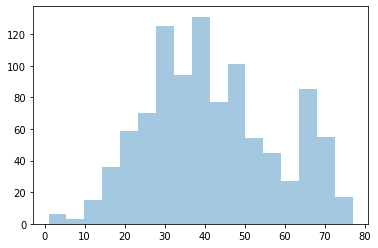

In [408]:
ages3_df = pd.read_csv('../data/ages_population3.csv')
sns.distplot(ages3_df,kde=False);

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [409]:
display(ages3_df['observation'].mean())
display(ages3_df['observation'].std())

41.989

16.14470595986593

In [ ]:
"""
we have a bigger std due to a high number of persons between 65 and 70 years old
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [410]:
ages3_df.describe()

,observation
count,1000.000000
mean,41.989000
std,16.144706
min,1.000000
25%,30.000000
50%,40.000000
75%,53.000000
max,77.000000


In [ ]:
"""
mean and median are very close. we have a lot of elderlies but just a few young people
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [418]:
np.percentile(ages3_df, 90)


67.0

In [ ]:
"""
40% of the sample are located between 40 and 67 years old.
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""